## Data Collection

Librairies

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
import os
import csv
%matplotlib qt 

Export txt into csv

In [10]:
# check all files in the directory
all_files_txt = os.listdir('data/txt/11-05-2024_data_acquisition/')
for filename in all_files_txt:
    if filename.endswith(".txt"):
        with open('data/txt/11-05-2024_data_acquisition/'+filename, 'r') as file:
            lines = file.readlines()

        # Process data
        data = []
        for line in lines:
            if line.strip() and not line.startswith('*'):
                parts = line.strip().split()
                tracker = parts[0].strip(':')
                id = parts[1]
                x = parts[2]
                y = parts[3]
                z = parts[4]
                timestamp = parts[5]
                data.append([tracker, id, x, y, z, timestamp])

        # Write data to a CSV file
        with open('data/csv/11-05-2024/'+filename.replace('.txt', '.csv'), 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['tracker', 'id', 'x', 'y', 'z', 'timestamp'])
            writer.writerows(data)

        print("Data exported in CSV")

Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV
Data exported in CSV


Loading data and cleaning 

In [13]:
data = pd.read_csv("data/csv/11-05-2024/dynamic_B1_A2_0.csv")
data_n = data.drop(columns=["tracker", "id"])

In [14]:
print(data.describe())
print("")
print(data.info())

                x           y      z
count  147.000000  147.000000  147.0
mean     2.939367    1.458027    1.5
std      1.642446    1.388602    0.0
min      0.783000   -0.985000    1.5
25%      1.099000    0.244500    1.5
50%      3.080000    1.537000    1.5
75%      4.532500    2.883500    1.5
max      5.330000    3.269000    1.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tracker    147 non-null    object 
 1   id         147 non-null    object 
 2   x          147 non-null    float64
 3   y          147 non-null    float64
 4   z          147 non-null    float64
 5   timestamp  147 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.0+ KB
None


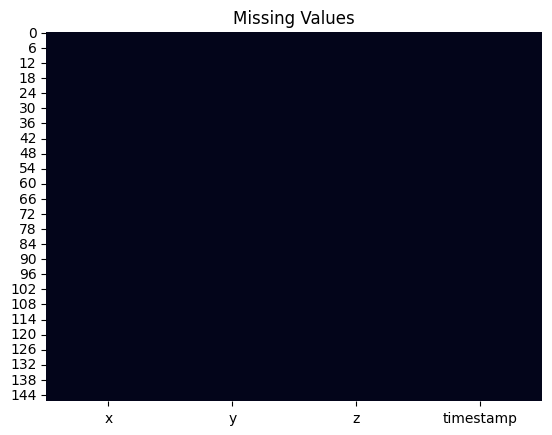

In [16]:
# heatmap of missing data
# Create a heatmap of missing values
sns.heatmap(data_n.isnull(), cbar=False)
plt.title('Missing Values')
plt.show()


Plot the raw Data in animation

In [20]:
# Initialize the plot
fig, ax = plt.subplots()
line, = ax.plot([], [], 'ro-')

# Set plot limits
ax.set_xlim(min(data_n['x']) - 1, max(data_n['x']) + 1)
ax.set_ylim(min(data_n['y']) - 1, max(data_n['y']) + 1)

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(i):
    x = data_n['x'][:i]
    y = data_n['y'][:i]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=data_n.shape[0], interval=200, blit=True)

# Show the real point
A1 = [1, 0]
A2 = [1, 3.3]
B1 = [5.5, 0]
B2 = [5.5, 3.3]
O1 = [3.5, 0]
O2 = [3.5, 0.8]
O3 = [3.5, 1.8]
O4 = [3.5, 3.3]

# make always on the top
plt.scatter(A1[0], A1[1], c='b', label='A1', marker='x')
plt.scatter(A2[0], A2[1], c='b', label='A2', marker='x')
plt.scatter(B1[0], B1[1], c='b', label='B1', marker='x')
plt.scatter(B2[0], B2[1], c='b', label='B2', marker='x')
plt.scatter(O1[0], O1[1], c='b', label='O1', marker='x')
plt.scatter(O2[0], O2[1], c='b', label='O2', marker='x')
plt.scatter(O3[0], O3[1], c='b', label='O3', marker='x')
plt.scatter(O4[0], O4[1], c='b', label='O4', marker='x')


# Show the plot with animation
plt.legend()
plt.xlim(-1, 8)
plt.ylim(-1, 6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Raw Data Plot')
plt.show()

Add large noise at random

In [68]:
def add_noise(data, noise_level, frequency):
    """
    Adds noise to the data['X'] and data['Y'] columns.
    
    Parameters:
    data (DataFrame): Input data with 'X' and 'Y' columns.
    noise_level (float): The maximum noise level.
    frequency (int): The frequency of noise application.
    
    Returns:
    DataFrame: Data with added noise.
    """
    noisy_data = data.copy()
    num_points = len(data)
    
    noise_indices = np.random.choice(num_points, size=num_points // frequency, replace=False)
    noise_X = np.random.uniform(0, noise_level, size=num_points // frequency)
    noise_Y = np.random.uniform(0, noise_level, size=num_points // frequency)
    
    noisy_data.loc[noise_indices, 'x'] += noise_X
    noisy_data.loc[noise_indices, 'y'] += noise_Y
    
    return noisy_data
data_n = add_noise(data_n, 5, 10)

## Visualizer of Outliers

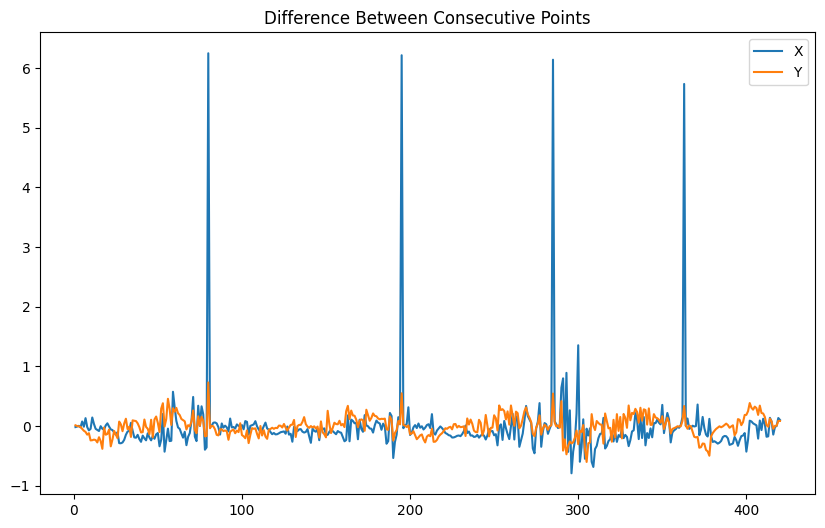

In [92]:
# Structural Analysis

# Calculate the difference between consecutive points

data_diff = data_n.iloc[:, 0:2].diff()
data_diff = data_diff.dropna()

# Plot the difference between consecutive points
plt.figure(figsize=(10, 6))
plt.plot(data_diff['x'], label='x')
plt.plot(data_diff['y'], label='y')
plt.title('Difference Between Consecutive Points')
plt.legend()
plt.show()

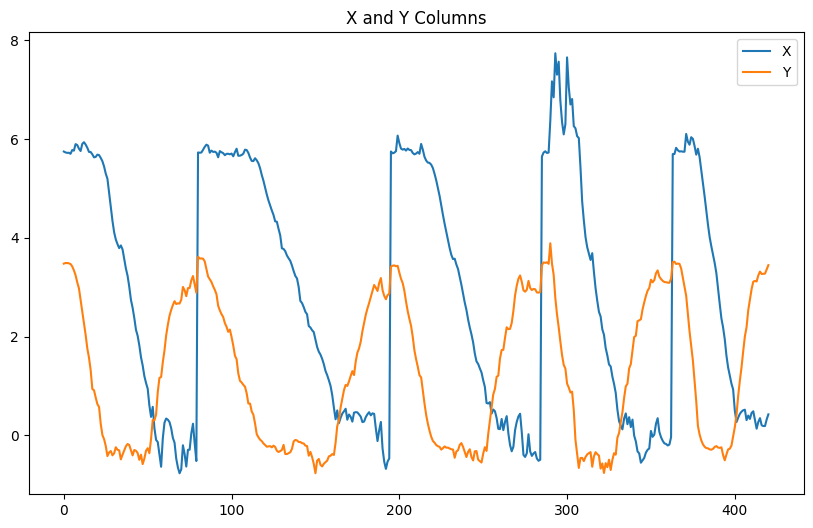

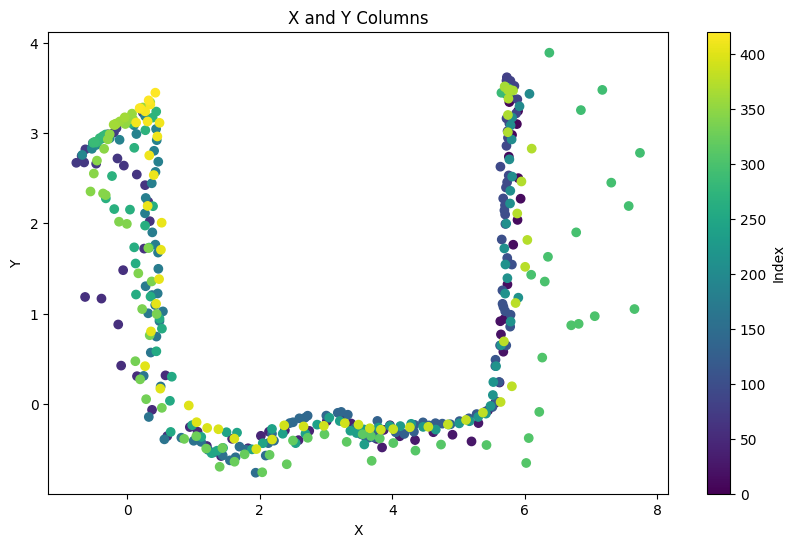

In [97]:
# Column Analysis

# Plot the 'X' and 'Y' columns
plt.figure(figsize=(10, 6))
plt.plot(data_n['x'], label='x')
plt.plot(data_n['y'], label='y')
plt.title('X and Y Columns')
plt.legend()
plt.show()

# Plot the 'X' and 'Y' columns with a scatter plot and color by index
plt.figure(figsize=(10, 6))
plt.scatter(data_n['x'], data_n['y'], c=data_n.index)
plt.title('X and Y Columns')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Index')
plt.show()



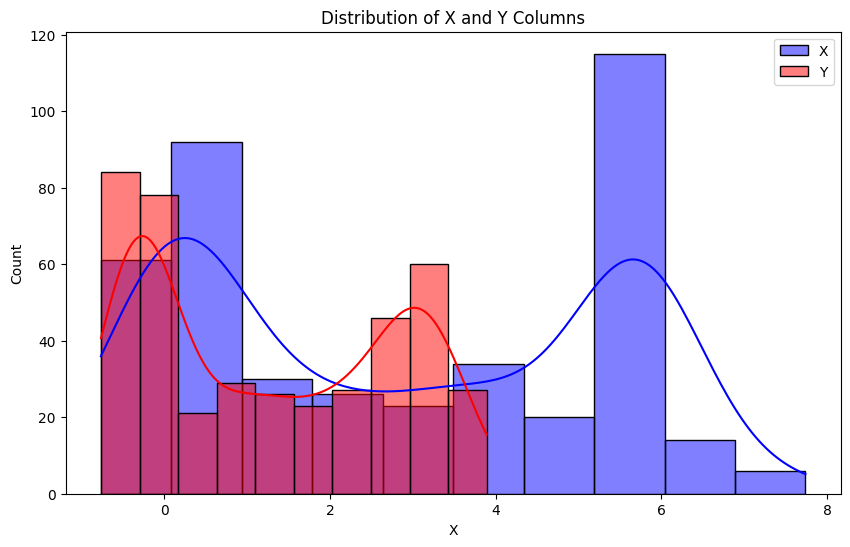

In [105]:
# Distribution Analysis

# Plot the distribution of the 'X' and 'Y' columns

plt.figure(figsize=(10, 6))
sns.histplot(data_n['x'], kde=True, color='blue', label='x')
sns.histplot(data_n['y'], kde=True, color='red', label='y')
plt.title('Distribution of X and Y Columns')
plt.legend()
plt.show()

In [22]:
# Descriptive Statistics

# Calculate the descriptive statistics of the 'X' and 'Y' columns
stats_X = data_n['x'].describe()
stats_Y = data_n['y'].describe()

# Print the descriptive statistics
print('Descriptive Statistics for X Column:')
print(stats_X)
print('\nDescriptive Statistics for Y Column:')
print(stats_Y)

# Plot the boxplot of the 'X' and 'Y' columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_n[['x', 'y']])
plt.title('Boxplot of X and Y Columns')
plt.show()

Descriptive Statistics for X Column:
count    147.000000
mean       2.939367
std        1.642446
min        0.783000
25%        1.099000
50%        3.080000
75%        4.532500
max        5.330000
Name: x, dtype: float64

Descriptive Statistics for Y Column:
count    147.000000
mean       1.458027
std        1.388602
min       -0.985000
25%        0.244500
50%        1.537000
75%        2.883500
max        3.269000
Name: y, dtype: float64
